In [1]:
from create_percent_diff_summary import collect_r2_scores, plot_r2_heatmap_with_symbols, replace_features_with_symbols
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

2024-12-05 06:23:45.375447: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 06:23:45.379560: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 06:23:45.392488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733379825.431476  660238 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733379825.437372  660238 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 06:23:45.460150: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
r2_scores, feature_labels = collect_r2_scores()


Processing folder: 8442181876429939992


2024-12-05 06:23:56.906970: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Processing folder: -2074223237608632438
Processing folder: 3018420796423631326
Processing folder: 385785126364412875
Processing folder: -5378767990556019025
Processing folder: -8721302243423950900
Processing folder: -1555579470930404703
Processing folder: 873396586410074794
Processing folder: -4385726170902574240
Processing folder: -6732384669984308125
Processing folder: -5688998736288883500
Processing folder: 9100019189307562067
Processing folder: -8578990204916954013
Processing folder: 7859769112433691692
Processing folder: -5339593163521714121
Processing folder: -3586271143228161277
Processing folder: -2691622148981425901
Processing folder: -5378767990556019025
Processing folder: 8829278676365283750
Processing folder: -2143628280432124037
Processing folder: -5675580404039521027
Processing folder: 1680180829675865592
Processing folder: 3123685554898137390
Processing folder: -8335083044558368468
Processing folder: 4478560288447804787
Processing folder: 4143972947282222655
Processing f

In [3]:
feature_labels

['s, b, h, mag_h, mag_s, mag_b, driving_stress, heatflux, snow_accumulation, surface_air_temp, gravity_disturbance',
 's, h, mag_h, mag_s, driving_stress, snow_accumulation, surface_air_temp',
 's, h, mag_h, mag_s, driving_stress',
 's, h, mag_h, mag_s, snow_accumulation',
 's, h, mag_h, mag_s, surface_air_temp',
 's, h, mag_h, mag_s',
 'mag_h, mag_s',
 's, h',
 'driving_stress, snow_accumulation, surface_air_temp',
 'b, mag_b, gravity_disturbance',
 'b, mag_b, heatflux, gravity_disturbance',
 'b, mag_b, heatflux',
 'heatflux, gravity_disturbance',
 's, h, mag_h, mag_s, surface_air_temp, heatflux, gravity_disturbance']

In [4]:
# Dataset labels
DATASET_NAMES = [
    "dotson, thwaites",
    "pig, thwaites",
    "dotson, pig",
    "dotson",
    "pig",
    "thwaites",
]

In [5]:
# Visualize R2 scores using a heatmap with symbols and fixed cbar range
def plot_r2_heatmap_with_symbols_new(r2_scores, feature_labels):
    feature_symbols = replace_features_with_symbols(feature_labels)
    r2_df = pd.DataFrame(np.array(r2_scores).T, columns=DATASET_NAMES, index=feature_symbols)

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        r2_df,
        annot=True,
        fmt=".2f",
        cmap="YlGn",
        cbar=True,
        vmin=0,  # Minimum value of the color bar
        vmax=1,  # Maximum value of the color bar
    )
    plt.title("Validation $R^2$ Scores for Feature Subsets and Datasets")
    plt.ylabel("Feature Subsets")
    plt.xlabel("Training Dataset Combinations")
    #plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

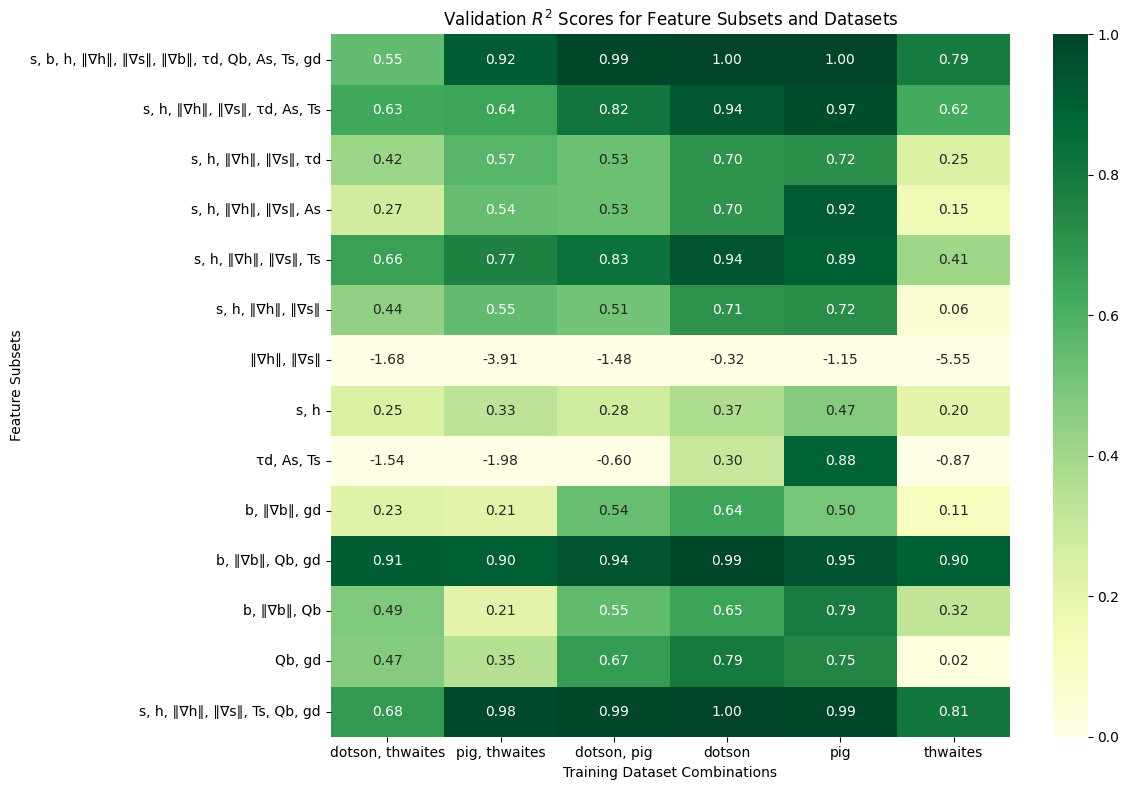

In [6]:
plot_r2_heatmap_with_symbols_new(r2_scores, feature_labels)

In [7]:
save_array = np.array(r2_scores).T

In [8]:
np.save('save_array.npy', save_array)